In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from src.processing.constants import *
from src.processing.utils import list_files
from src.processing.txt_loading import txt_to_list
from src.processing.radial import radial_select, order_coords, create_radius_select_stack, find_period_radial_select
from src.processing.constants import BUCKLING_PATH, EDGE_TRACKING_PATH
from src.processing.autocorrelation import autocorrelate_single_value, autocorrelate_radial_ring
from src.processing.wrinkle_period import find_period_autocorrelation_fft, periods_from_image, periods_multiple_radii
from src.processing.crosscorrelation import crosscorrelation_0_to_j
from src.processing.radius_vs_intensity import plot_radius_vs_intensity

Load stack and image

In [2]:
bio_stack = imread(str(BUCKLING_PATH / '200920_biolight_nobg_nooutliers_despeckle_enhance.tif'))
bright_stack = imread(str(BUCKLING_PATH / '200920_normallight_nobg_edges_gaussblur_enhance.tif'))

In [3]:
slice_no_bio = 150
STACK_B_TO_N_RATIO = len(bio_stack) / len(bright_stack)
slice_no_bright = int(slice_no_bio / STACK_B_TO_N_RATIO)

In [4]:
img_b = bio_stack[slice_no_bio]
img_n = bright_stack[slice_no_bright]

Create centres and radii lists

In [4]:
timestamps_b, radii_b, x_center_b, y_center_b = txt_to_list(str(EDGE_TRACKING_PATH/'200920_biolight_fitted_circle_position_data.txt'))
x_center, y_center = x_center_b[slice], y_center_b[slice]
center_fitted = (x_center, y_center)
coffee_ring_radius = radii_b[0]

Plot radius over time

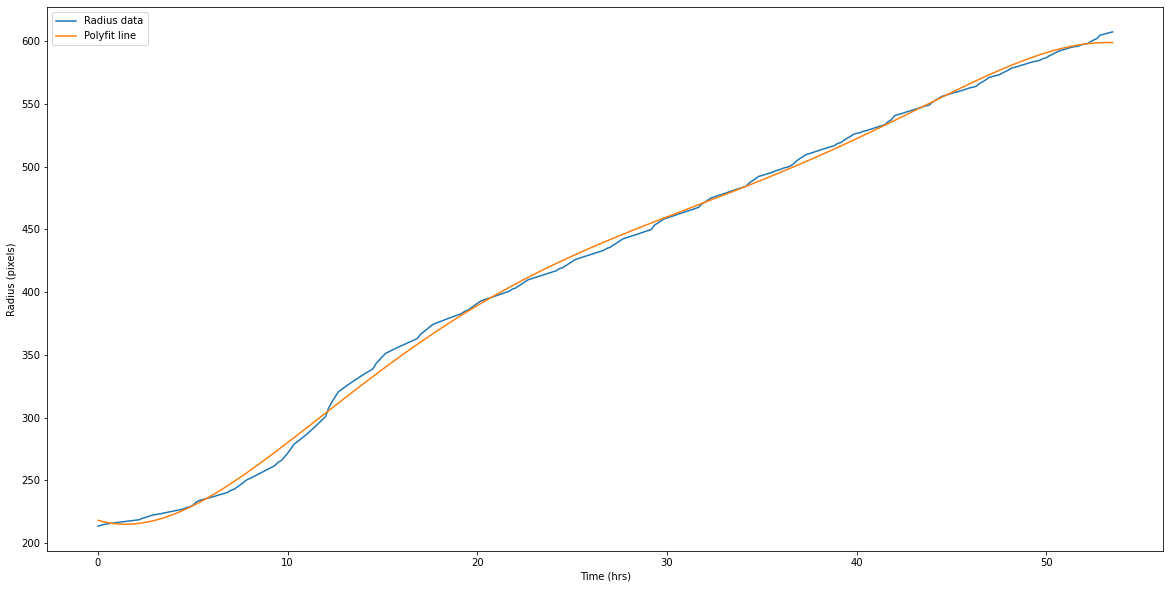

322


In [22]:
plt.figure(figsize=(20,10))

#find fit coefficients
x = np.arange(0, len(radii_b))
time = x*(1/6)
coeff = np.polyfit(time, radii_b, 5)
f = np.polyval(coeff,time)

#plot data and polyfit
plt.plot(time, radii_b, label='Radius data')
plt.plot(time, f,'-', label='Polyfit line')

plt.xlabel('Time (hrs)')
plt.ylabel('Radius (pixels)')
plt.legend()
plt.show()

print(len(x))

Plot intensity of image vs biofilm radius

no time intervals biolight=  322
no time intervals nromallight=  452


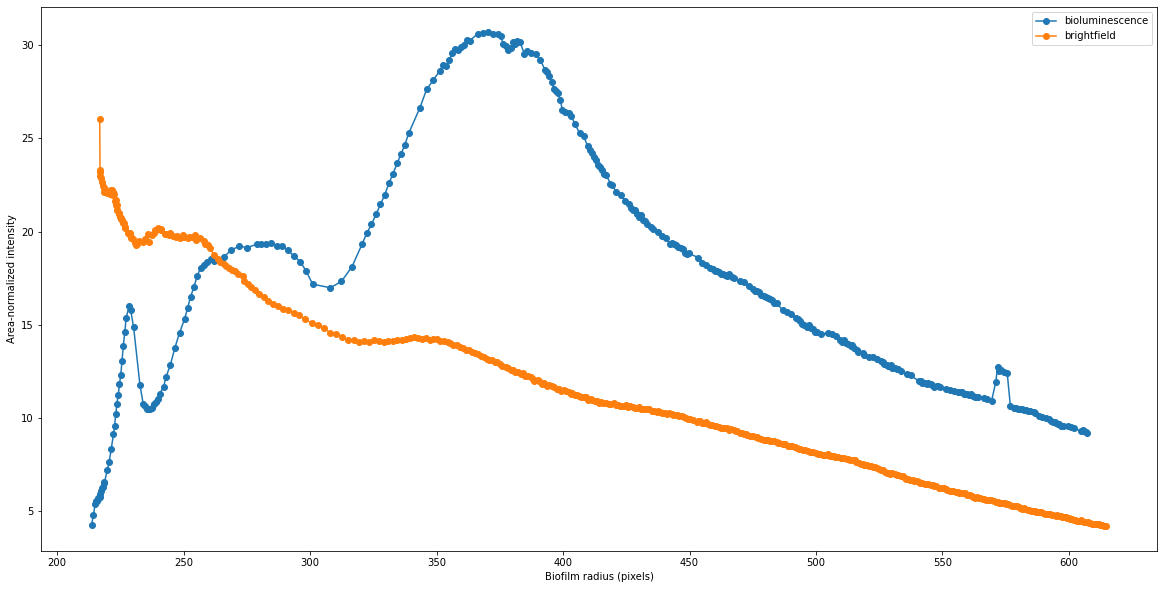

In [3]:
plot_radius_vs_intensity(bio_stack, bright_stack)